<a href="https://colab.research.google.com/github/dchatterjee/motion-planning-workspace/blob/main/clothoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

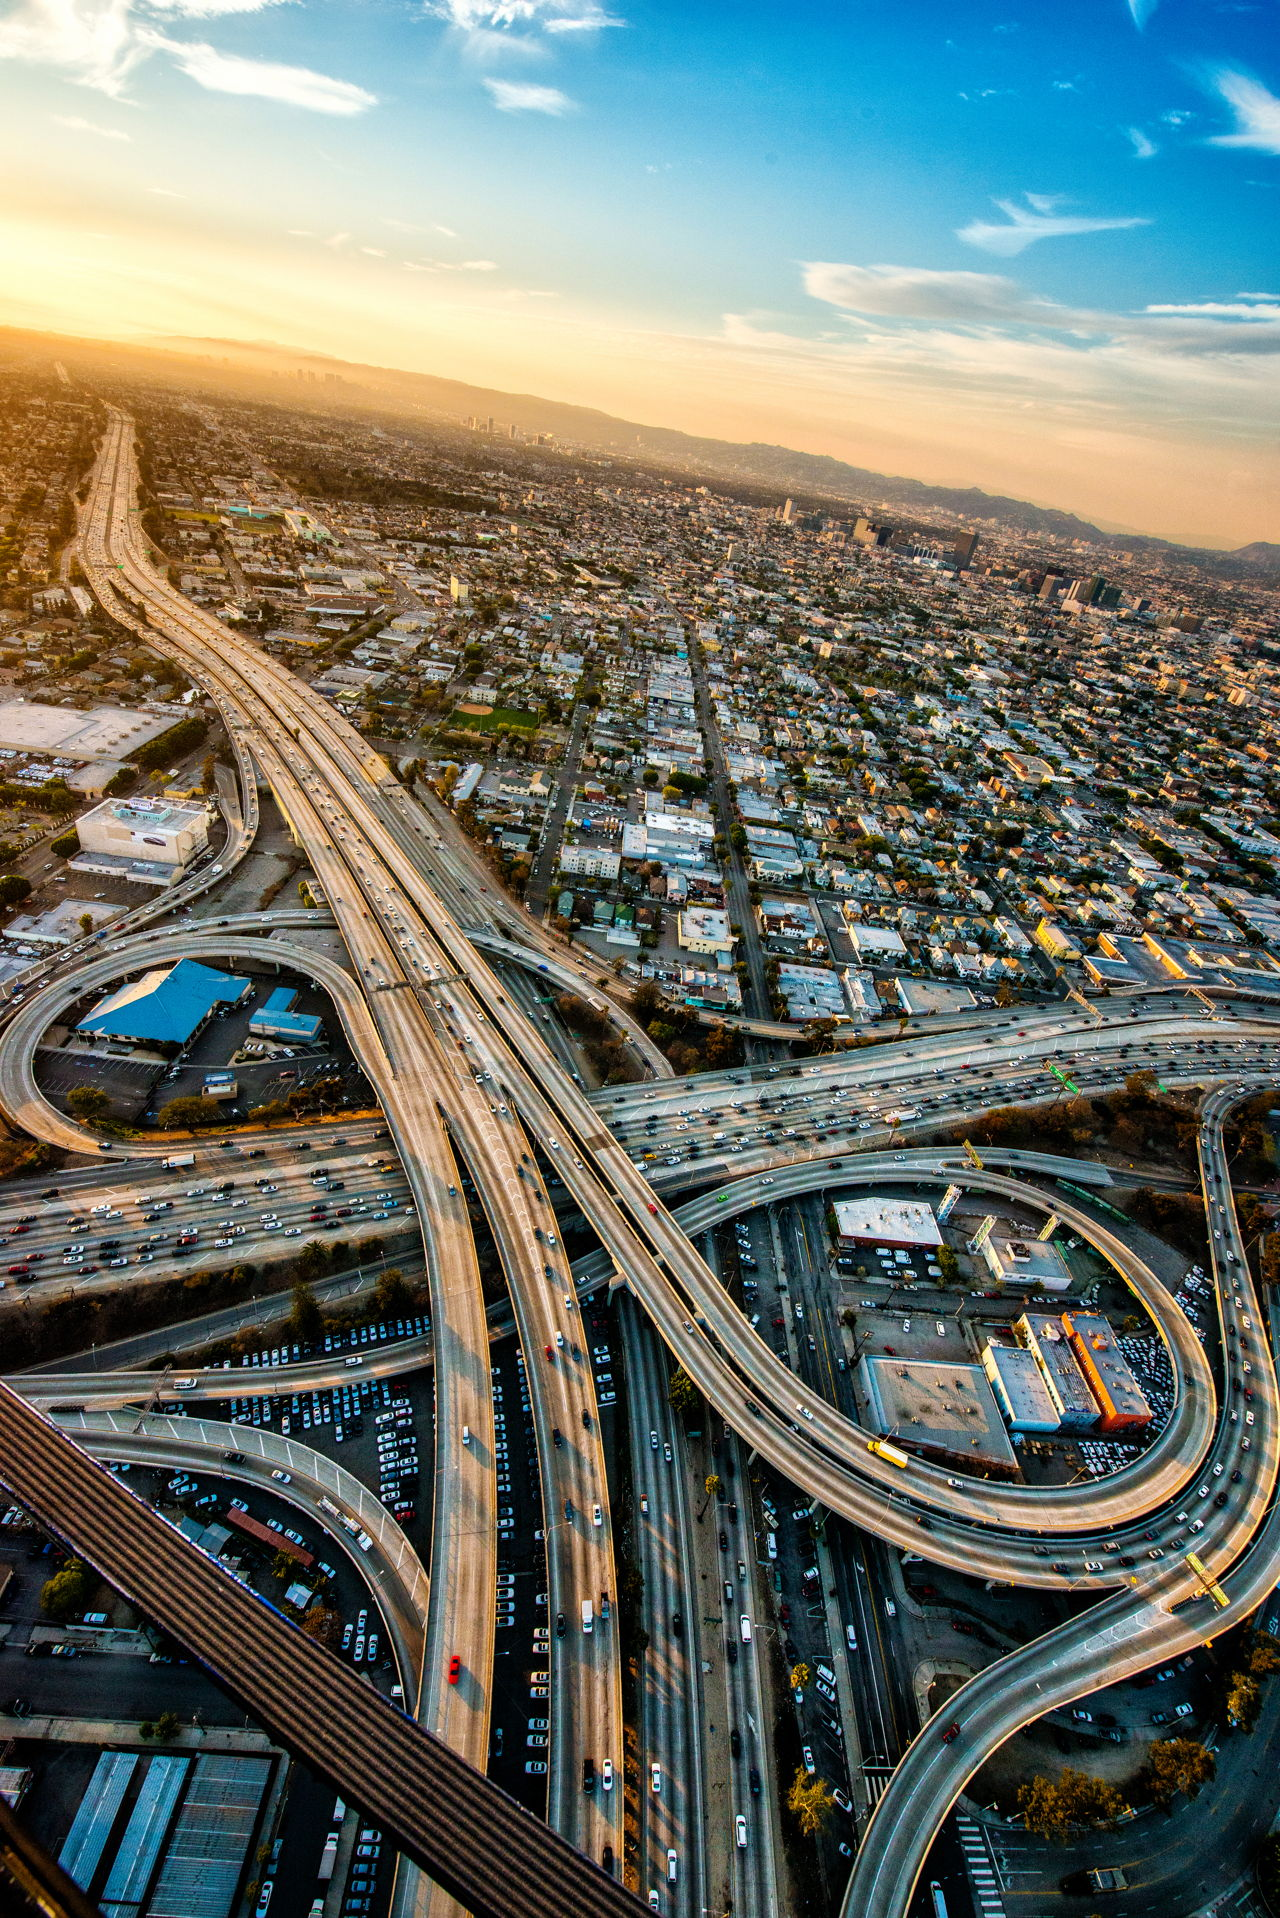



# Even thought why roads are designed the way they do. 
We use clothoids to design the curvature of the roads so they blend into one another without discontiuity

Clothoids are best represented by the following ODE

## The math of evaluating clothoids
A clothoid can be defined uniquely by 
* the coordinates and heading at which it starts: $(x_0, y_0, \theta_0)$
* its linear curvature function which is determined by the two coefficients $(\kappa_0, \kappa_1)$.
* its length $L$.

Given the five values $(x_0, y_0, \theta_0, \kappa_0, \kappa_1, L)$ we can evaluate the clothoid's position and heading $(x(s), y(s), \theta(s))$ at any point $s$ in $[0,L]$. We do that by solving the following ODE:

\begin{equation}
\begin{array}{ccc}
x'(s) &=& \cos \theta(s) \\
y'(s) &=& \sin \theta(s) \\
\theta'(s) &=&  \kappa_0 + \kappa_1 s  
\end{array}
\end{equation}

In [1]:
import numpy as np
from scipy.integrate import odeint
def clothoid_ode_rhs(state, s, kappa0, kappa1):
    x, y, theta = state[0], state[1], state[2]
    return np.array([np.cos(theta), np.sin(theta), kappa0 + kappa1*s])
def eval_clothoid(x0,y0,theta0, kappa0, kappa1, s):
    return odeint(clothoid_ode_rhs, np.array([x0,y0,theta0]), s, (kappa0, kappa1))

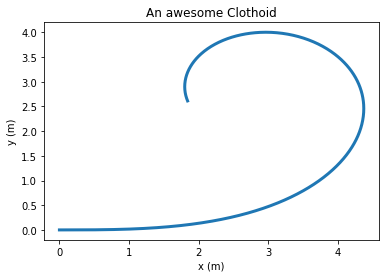

In [4]:
import matplotlib.pyplot as plt

x0,y0,theta0 = 0,0,0
L = 10
kappa0, kappa1 = 0, 0.1
s = np.linspace(0, L, 1000)

sol = eval_clothoid(x0, y0, theta0, kappa0, kappa1, s)

xs, ys, thetas = sol[:,0], sol[:,1], sol[:,2] 
plt.plot(xs, ys, lw=3);
plt.xlabel('x (m)');
plt.ylabel('y (m)');
plt.title('An awesome Clothoid');